In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

Use TF's built-in methods to generate pictures of hand-written digits to classify.

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Now we do the actual TF stuff!
Placeholders are what we use to shove data into the graph.

In [3]:
feed_pics = tf.placeholder(shape=[None, 784], dtype=tf.float32)
feed_nums = tf.placeholder(shape=[None, 10], dtype=tf.float32)

Now we start to build the computation graph. W_1, b_1 are the weights/biases (respectively) for our first hidden layer.
We use TF's built-in random_normal number generator to initially populate the variables before training.
Note the shapes of the matrices/biases.

In [4]:
W_1 = tf.Variable(tf.random_normal(shape=[784, 100], stddev=0.01))
b_1 = tf.Variable(tf.random_normal(shape=[100,], stddev=0.01))

W_2, b_2 are the weights/biases for the output layer, initialized similarly to W_1, b_1.

In [5]:
W_2 = tf.Variable(tf.random_normal(shape=[100,10]))
b_2 = tf.Variable(tf.random_normal(shape=[10,]))

If we run one of the Variables we've defined, we get back a TF object.
This is because the neural network isn't defined as a structure in Python, really.
The neural network is defined on TF's special computation graph - it abstracts operations 
(mathematics, variable operations, etc) into a separate layer that runs things hyper quickly.

In [ ]:
W_2

This tells the graph to compute the output of the network's first layer (the hidden layer).

In [6]:
layer_1 = tf.tanh(tf.matmul(feed_pics, W_1) + b_1)

Tell the graph to compute the output of the last layer of the network.

In [7]:
layer_2_logits = tf.matmul(layer_1, W_2) + b_2
layer_2 = tf.nn.softmax(layer_2_logits)

Define a loss function to quantify how poorly - or how well - the network performs on a particular piece
of data. Loss functions are only computable on data that has a label associated with in - in our case, we
can only compute a loss for a digit image whose label we know beforehand.

In [8]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=feed_nums, logits=layer_2_logits))

Pick an optimizer to tell TF how to find a minimum error, and tell it which function to minimize.

In [9]:
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(loss)

The TF graph is now created! All we have to do now is some boilerplate stuff;
defining the session, initializing all of the TF variables we've declared above.

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Train the network with ten separate sets of 100 characters from MNIST and spit out the error as training progresses.

In [12]:
for i in range(10):
    batch = mnist.train.next_batch(100)
    err, _ = sess.run(fetches=[loss, optimizer], feed_dict={feed_pics:batch[0], feed_nums:batch[1]})
    print('Error at time {0}:{1}'.format(i, err))

Error at time 0:2.764228582382202
Error at time 1:2.601789951324463
Error at time 2:2.320183753967285
Error at time 3:2.111851930618286
Error at time 4:2.0129730701446533
Error at time 5:1.8355351686477661
Error at time 6:1.6005293130874634
Error at time 7:1.876420021057129
Error at time 8:1.6669143438339233
Error at time 9:1.4947216510772705


Grab 25 MNIST digits that the network *hasn't* seen before, and see how well the network does classifying them.
Creates 25 graphs inside of iPython... be wary.

C:\Users\jtgil\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


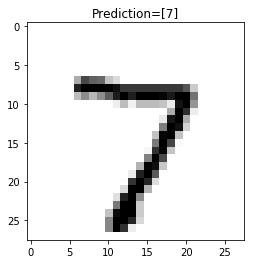

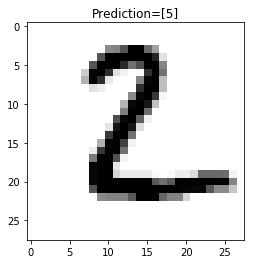

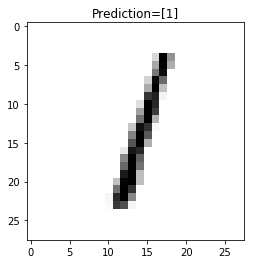

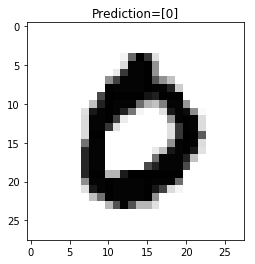

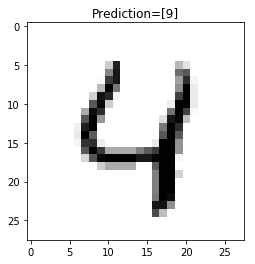

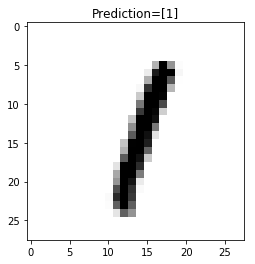

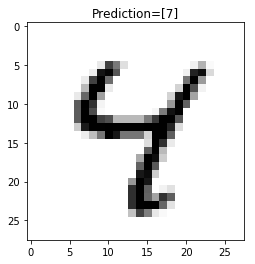

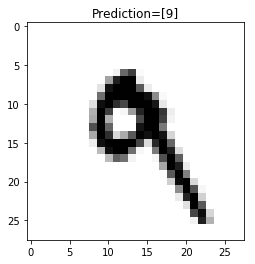

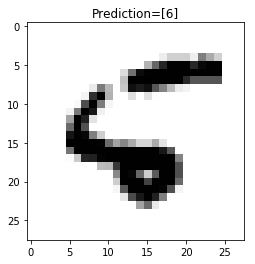

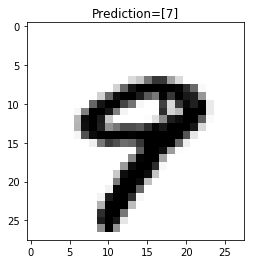

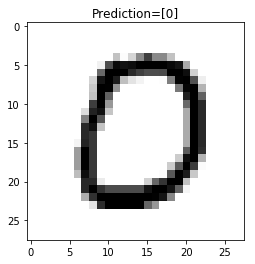

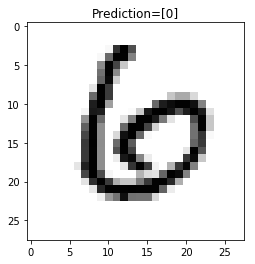

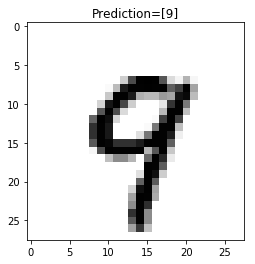

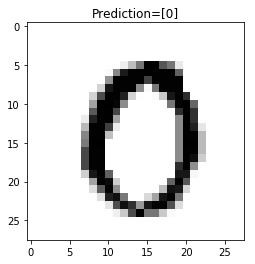

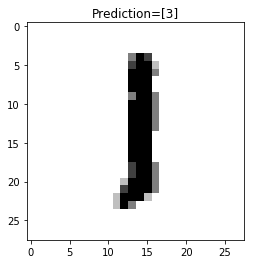

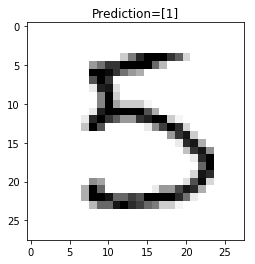

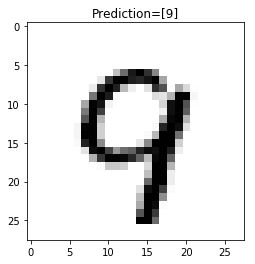

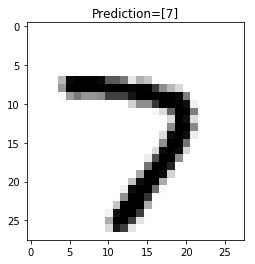

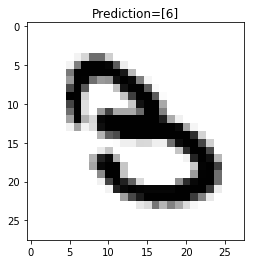

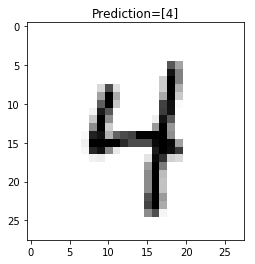

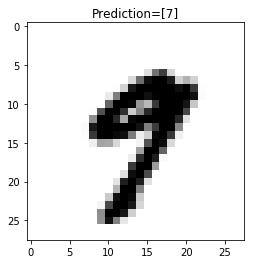

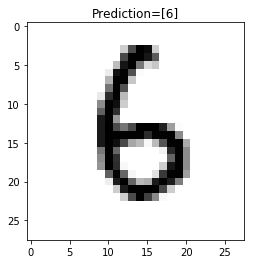

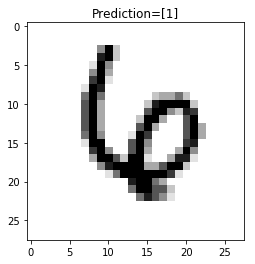

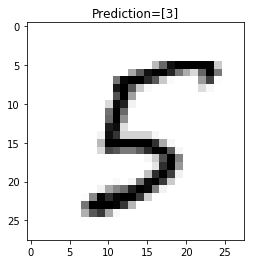

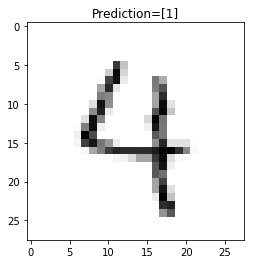

In [13]:
test_images = []
for i in range(25):
    digit = mnist.test.next_batch(1)[0]
    prediction = sess.run(fetches=[layer_2], feed_dict={feed_pics:digit})
    
    test_images.append(digit.reshape([28, 28]))
    
    plt.figure()
    plt.imshow(test_images[i], cmap=plt.get_cmap('gray_r'))
    plt.title('Prediction=' + str(np.where(prediction[0] == np.max(prediction))[1]))
plt.show()

Some of the classifications that were made above were most likely wrong, so we'll train the network longer and 
allow the error to decrease.
Note that this isn't the most principled way to perform training (normally we'd train until the error on some
validation data is minimized, or until a maximum number of training steps are reached), but it works for our purposes.

In [14]:
for i in range(10000):
    batch = mnist.train.next_batch(100)
    err, _ = sess.run(fetches=[loss, optimizer], feed_dict={feed_pics:batch[0], feed_nums:batch[1]})
    if i % 100 == 0:
        print('Error at time {0}:{1}'.format(i, err))

Error at time 0:1.3276703357696533
Error at time 100:0.5751770734786987
Error at time 200:0.2807818651199341
Error at time 300:0.4579698145389557
Error at time 400:0.5809569358825684
Error at time 500:0.27393537759780884
Error at time 600:0.28565630316734314
Error at time 700:0.2563948333263397
Error at time 800:0.31689512729644775
Error at time 900:0.28846853971481323
Error at time 1000:0.13626642525196075
Error at time 1100:0.06167946383357048
Error at time 1200:0.14830282330513
Error at time 1300:0.23022358119487762
Error at time 1400:0.24686071276664734
Error at time 1500:0.11515296995639801
Error at time 1600:0.14082138240337372
Error at time 1700:0.12637102603912354
Error at time 1800:0.22573703527450562
Error at time 1900:0.04676802083849907
Error at time 2000:0.09746219962835312
Error at time 2100:0.12864960730075836
Error at time 2200:0.07325536012649536
Error at time 2300:0.04757920652627945
Error at time 2400:0.13036750257015228
Error at time 2500:0.07557061314582825
Error a

Plot a new set of images and the classifications; most, if not all, of the test images should be classified correctly.
You've trained your first neural network!

C:\Users\jtgil\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


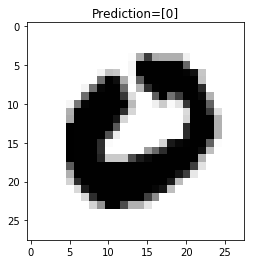

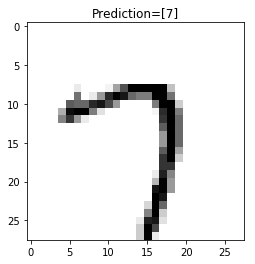

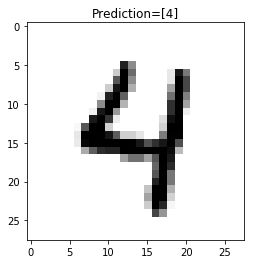

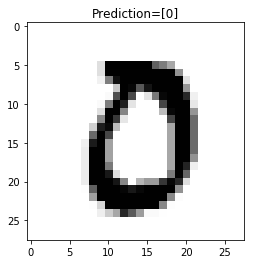

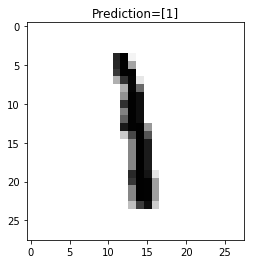

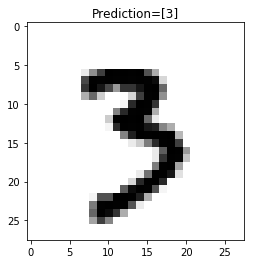

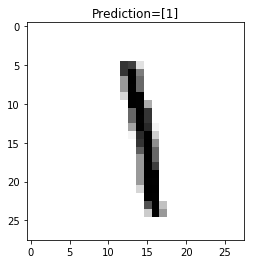

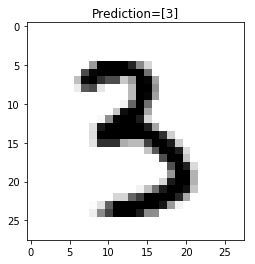

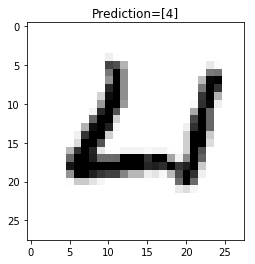

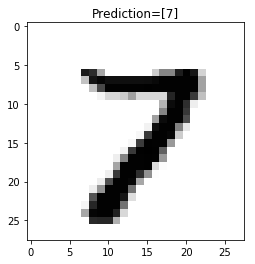

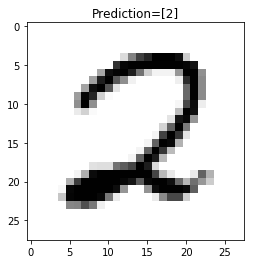

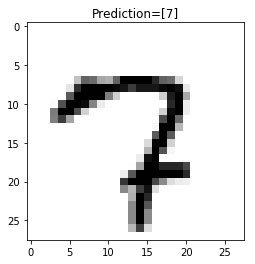

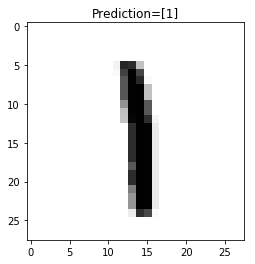

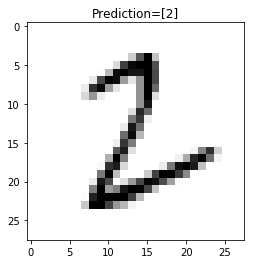

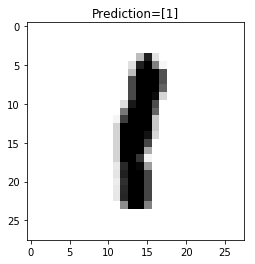

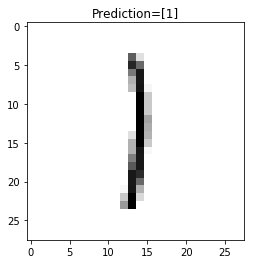

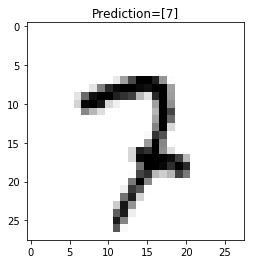

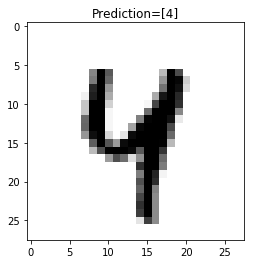

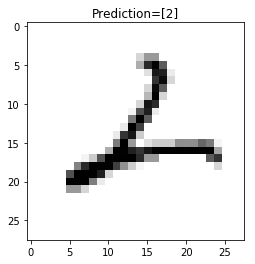

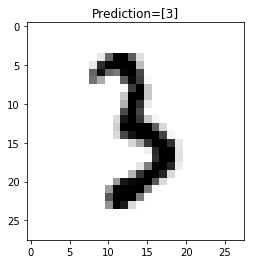

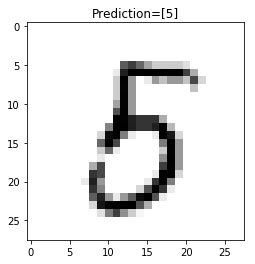

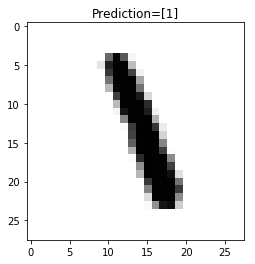

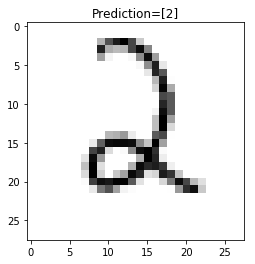

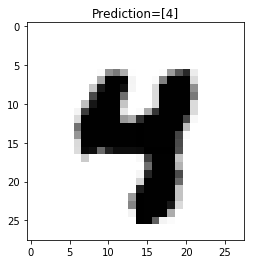

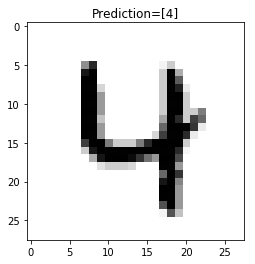

In [15]:
test_images = []
for i in range(25):
    digit = mnist.test.next_batch(1)[0]
    prediction = sess.run(fetches=[layer_2], feed_dict={feed_pics:digit})
    
    test_images.append(digit.reshape([28, 28]))
    
    plt.figure()
    plt.imshow(test_images[i], cmap=plt.get_cmap('gray_r'))
    plt.title('Prediction=' + str(np.where(prediction[0] == np.max(prediction))[1]))
plt.show()